In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


avgSpeed = 9.6 / 3600 # average biker speed in miles per second according to wikipedia

df = pd.read_csv('metro-bike-share-trip-data.csv')
df.sample(5)

/Users/brian/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
33708,5051515,900,2016-08-29T12:18:00,2016-08-29T12:33:00,3075.0,34.042110,-118.256190,3075.0,34.042110,-118.256190,5881.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.25619', 'latitude': '34.04...","{'longitude': '-118.25619', 'latitude': '34.04..."
76619,12512521,360,2016-11-06T10:25:00,2016-11-06T10:31:00,3048.0,34.041691,-118.235352,3058.0,34.035801,-118.233170,6561.0,0.0,One Way,Walk-up,"{'longitude': '-118.235352', 'latitude': '34.0...","{'longitude': '-118.23317', 'latitude': '34.03..."
69937,11243574,480,2016-10-24T23:54:00,2016-10-25T00:02:00,3022.0,34.046070,-118.233093,3038.0,34.046822,-118.248352,6344.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.233093', 'latitude': '34.0...","{'longitude': '-118.248352', 'latitude': '34.0..."
54161,8180090,300,2016-09-29T08:05:00,2016-09-29T08:10:00,3056.0,34.037460,-118.265380,3034.0,34.042061,-118.263380,6193.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.26538', 'latitude': '34.03...","{'longitude': '-118.26338', 'latitude': '34.04..."
61104,9518058,1200,2016-10-10T11:43:00,2016-10-10T12:03:00,3082.0,34.046520,-118.237411,3035.0,34.048401,-118.260948,6174.0,0.0,One Way,Walk-up,"{'longitude': '-118.237411', 'latitude': '34.0...","{'longitude': '-118.260948', 'latitude': '34.0..."


In [2]:
import decimal
def selectMostPrecise(arr):
    if len(arr) == 0:
        return arr[0]
    else:
        bestPrecision = 1
        bestVal = np.nan
        for val in arr:
            if np.isnan(val):
                continue
            d = decimal.Decimal(str(val))
            exp = d.as_tuple().exponent
            if exp < bestPrecision:
                bestVal = val
                bestPrecision = exp
        return bestVal

station_long = pd.DataFrame(df.groupby(['Starting Station ID'])['Starting Station Longitude'].unique().apply(selectMostPrecise))
station_lat = pd.DataFrame(df.groupby(['Starting Station ID'])['Starting Station Latitude'].unique().apply(selectMostPrecise))

station_locs = station_lat.merge(station_long, left_index=True, right_index=True)

station_locs[station_locs.isnull().any(axis=1)]

,Starting Station Latitude,Starting Station Longitude
Starting Station ID,,
3000.0,NaN,NaN


In [3]:
station_locs.sample(5)

,Starting Station Latitude,Starting Station Longitude
Starting Station ID,,
3021.0,34.045609,-118.237030
3022.0,34.046070,-118.233093
3040.0,34.053570,-118.266357
3011.0,34.041130,-118.267982
3030.0,34.051941,-118.243530


In [4]:
station_locs[station_locs.index == 3038]

,Starting Station Latitude,Starting Station Longitude
Starting Station ID,,
3038.0,34.046822,-118.248352


In [5]:
df.shape

(132427, 16)

## Data Visuals: 
1. Display or graph 3 metrics or trends from the data set that are interesting to you.
2. Which start/stop stations are most popular?
3. What is the average distance traveled?
4. How many riders include bike sharing as a regular part of their commute?


## (Optional) Bonus features you may want to include to stand out:
- How does ridership change with seasons? Types of passes used, trip duration, etc
- Is there a net change of bikes over the course of a day? If so, when and
where should bikes be transported in order to make sure bikes match travel patterns?
- What is the breakdown of Trip Route Category-Passholder type combinations? What might make a particular combination more popular?

In [6]:
df.groupby(['Starting Station ID']).count().sort_values(['Trip ID'], ascending=False).head(1)

,Trip ID,Duration,Start Time,End Time,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
Starting Station ID,,,,,,,,,,,,,,,
3069.0,5138,5138,5138,5138,5138,5138,5135,5095,5095,5138,5099,5138,5138,3757,5095


In [7]:
station_locs[station_locs.index == 3069]

,Starting Station Latitude,Starting Station Longitude
Starting Station ID,,
3069.0,34.05088,-118.248253


The most popular start station is station 3069 with 5138 trips starting there.

In [8]:
df.groupby(['Ending Station ID']).count().sort_values(['Trip ID'], ascending=False).head(1)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
Ending Station ID,,,,,,,,,,,,,,,
3005.0,6262,6262,6262,6262,6262,6262,6262,6262,6262,6262,6245,6262,6262,4630,6262


In [9]:
station_locs[station_locs.index == 3005]

,Starting Station Latitude,Starting Station Longitude
Starting Station ID,,
3005.0,34.04855,-118.259048


The most popular start station is station 3005 with 6262 trips ending there.

In [10]:
import math

def deg2rad(deg):
    return deg * (math.pi / 180)

def distanceLatLonKm(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = deg2rad(lat2-lat1)
    dlon = deg2rad(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(deg2rad(lat1)) * math.cos(deg2rad(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    return d
    

In [11]:
distanceLatLonKm(34.050140, -118.233240, 34.051941, -118.243530)

0.9689322288831954

In [12]:
def distanceKm(row):
    return distanceLatLonKm(row['Starting Station Latitude'], row['Starting Station Longitude'],
                            row['Ending Station Latitude'], row['Ending Station Longitude'])

OneWayTripDistances = df[df['Trip Route Category'] == 'One Way'].apply(distanceKm, axis=1)
OneWayTripDistances.sample()

80735    1.110329
dtype: float64

In [13]:
OneWayTripDistances.mean()

5.42331948912928

In [14]:
df['Distance'] = df['Duration'] * avgSpeed
df['Distance'].mean()

4.147470832987823

In [15]:
def kmToMi(km):
    return 0.621371192 * km

In [16]:
kmToMi(OneWayTripDistances.mean())

3.369894495557092

In [17]:
pd.unique(df['Passholder Type'])

array(['Monthly Pass', 'Flex Pass', 'Walk-up', 'Staff Annual'], dtype=object)

In [18]:
pd.unique(df['Trip Route Category'])

array(['Round Trip', 'One Way'], dtype=object)

In [19]:
pd.unique(df['Starting Station ID'])

array([ 3014.,  3016.,  3032.,  3021.,  3022.,  3076.,  3031.,  3063.,
        3042.,  3018.,  3054.,  3006.,  3037.,  3034.,  3005.,  3047.,
        3040.,  3066.,  3033.,  3030.,  3051.,  3019.,  3055.,  3065.,
        3068.,  3007.,  3052.,  3049.,  3075.,  3067.,  3020.,  3035.,
        3062.,  3058.,  3045.,  3080.,  3038.,  3053.,  3069.,  3036.,
        3079.,  4108.,  3060.,  3008.,  3056.,  3029.,  3028.,  3023.,
        3025.,  3074.,  3057.,  3027.,  3026.,  3078.,  3077.,  3059.,
        3010.,  3064.,  3046.,  3011.,  3048.,  3081.,  3024.,  3082.,
          nan,  3000.,  3009.,  3039.])

In [20]:
df[df.isnull().any(axis=1)]

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Distance
55444,8410788,31680,2016-10-01T00:58:00,2016-10-01T09:46:00,3082.0,34.046520,-118.237411,3000.0,NaN,NaN,5838.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.237411', 'latitude': '34.0...",NaN,84.48
55463,8424833,39000,2016-10-01T02:03:00,2016-10-01T12:53:00,3037.0,34.034801,-118.231277,3000.0,NaN,NaN,6197.0,0.0,One Way,Walk-up,"{'longitude': '-118.231277', 'latitude': '34.0...",NaN,104.00
55517,8415350,2760,2016-10-01T10:07:00,2016-10-01T10:53:00,3040.0,34.053570,-118.266357,3000.0,NaN,NaN,5830.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.266357', 'latitude': '34.0...",NaN,7.36
55547,8419995,1680,2016-10-01T10:58:00,2016-10-01T11:26:00,3049.0,34.056969,-118.253593,3000.0,NaN,NaN,5808.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.253593', 'latitude': '34.0...",NaN,4.48
55639,8444038,8640,2016-10-01T13:39:00,2016-10-01T16:03:00,3052.0,34.051102,-118.264557,3000.0,NaN,NaN,5931.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.264557', 'latitude': '34.0...",NaN,23.04
55651,8469581,27960,2016-10-01T13:59:00,2016-10-01T21:45:00,3016.0,34.052898,-118.241562,3000.0,NaN,NaN,6296.0,0.0,One Way,Walk-up,"{'longitude': '-118.241562', 'latitude': '34.0...",NaN,74.56
55660,8449036,11400,2016-10-01T14:14:00,2016-10-01T17:24:00,3034.0,34.042061,-118.263382,3000.0,NaN,NaN,6649.0,0.0,One Way,Walk-up,"{'longitude': '-118.263382', 'latitude': '34.0...",NaN,30.40
55696,8439011,1620,2016-10-01T15:01:00,2016-10-01T15:28:00,3006.0,34.045540,-118.256668,3000.0,NaN,NaN,6101.0,0.0,One Way,Walk-up,"{'longitude': '-118.256668', 'latitude': '34.0...",NaN,4.32
55790,8443856,360,2016-10-01T16:38:00,2016-10-01T16:44:00,3010.0,34.037048,-118.254868,3080.0,34.034210,-118.254593,5718.0,NaN,One Way,Staff Annual,"{'longitude': '-118.254868', 'latitude': '34.0...","{'longitude': '-118.254593', 'latitude': '34.0...",0.96
55883,8453843,840,2016-10-01T18:24:00,2016-10-01T18:38:00,3019.0,34.038609,-118.260857,3038.0,34.046822,-118.248352,6579.0,NaN,One Way,Staff Annual,"{'longitude': '-118.260857', 'latitude': '34.0...","{'longitude': '-118.248352', 'latitude': '34.0...",2.24


In [21]:
# [{
#                     "type": "Feature",
#                     "geometry": {
#                         "type": "Point",
#                         "coordinates": [-77.03238901390978, 38.913188059745586]
#                     },
#                     "properties": {
#                         "title": "Mapbox DC",
#                         "icon": "monument"
#                     }
#                 }, {
#                     "type": "Feature",
#                     "geometry": {
#                         "type": "Point",
#                         "coordinates": [-122.414, 37.776]
#                     },
#                     "properties": {
#                         "title": "Mapbox SF",
#                         "icon": "harbor"
#                     }
#                 }]

In [22]:
features = []

for row in station_locs.iterrows():
    sid = int(row[0])
    long = row[1]['Starting Station Longitude']
    lat = row[1]['Starting Station Latitude']
    if not (np.isnan(long) or np.isnan(lat)):
        features.append(
        {
            'type': "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [long, lat]
            },
            'id': sid,
            "properties": {
#                 "station_id": sid,
            }
        })
import json


text_file = open("stations.json", "w")
text_file.write(json.dumps(features))
text_file.close()

In [23]:
pd.unique(df['Bike ID']).shape

(764,)

In [24]:
df.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Distance
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05...",0.48
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05...",5.28
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05...",0.80
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05...",28.96
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04...",1.12


In [25]:
df.tail()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Distance
132422,23660993,540,2017-03-31T23:43:00,2017-03-31T23:52:00,3055.0,34.044159,-118.251579,3035.0,34.048401,-118.260948,5978.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.260948', 'latitude': '34.0...",1.44
132423,23660992,480,2017-03-31T23:44:00,2017-03-31T23:52:00,3055.0,34.044159,-118.251579,3035.0,34.048401,-118.260948,6478.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.260948', 'latitude': '34.0...",1.28
132424,23660991,480,2017-03-31T23:44:00,2017-03-31T23:52:00,3082.0,34.046520,-118.237411,3054.0,34.039219,-118.236488,6183.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.236488', 'latitude': '34.0...",1.28
132425,23660990,420,2017-03-31T23:45:00,2017-03-31T23:52:00,3082.0,34.046520,-118.237411,3054.0,34.039219,-118.236488,5900.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.236488', 'latitude': '34.0...",1.12
132426,23664826,1260,2017-03-31T23:45:00,2017-04-01T00:06:00,3078.0,34.064281,-118.238937,3029.0,34.048851,-118.246422,6207.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.246422', 'latitude': '34.0...",3.36


In [26]:
df['month'] = df['Start Time'].apply(lambda x: x.split("-")[0] + "-" + x.split("-")[1])
df['hour'] = df['Start Time'].apply(lambda x: int(x.split("T")[1].split(":")[0]))
df['day'] = df['Start Time'].apply(lambda x: x.split("T")[0])

In [27]:
df.groupby('month').count().reset_index()

,month,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Distance,hour,day
0,2016-07,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420,11420
1,2016-08,24153,24153,24153,24153,24153,24153,24153,24153,24153,24153,24153,24153,24153,24153,24153,24153,24153,24153,24153
2,2016-09,19866,19866,19866,19866,19866,19866,19866,19866,19866,19866,19866,19866,19866,19866,19866,19866,19866,19866,19866
3,2016-10,18159,18159,18159,18159,18150,18150,18150,18135,18008,18008,18159,18002,18159,18159,18150,18008,18159,18159,18159
4,2016-11,14430,14430,14430,14430,14426,14426,14426,14400,14270,14270,14427,14337,14430,14430,14426,14270,14430,14430,14430
5,2016-12,10613,10613,10613,10613,10607,10607,10607,10571,10437,10437,10612,10481,10613,10613,10607,10437,10613,10613,10613
6,2017-01,10347,10347,10347,10347,10347,10346,10346,10347,10157,10157,10347,10230,10347,10347,0,10157,10347,10347,10347
7,2017-02,9533,9533,9533,9533,9533,9527,9527,9533,9374,9374,9531,9413,9533,9533,0,9374,9533,9533,9533
8,2017-03,13906,13906,13906,13906,13906,13884,13884,13906,13691,13691,13902,13759,13906,13906,0,13691,13906,13906,13906


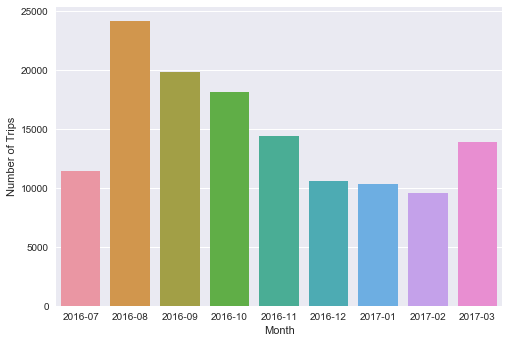

In [28]:
sns.barplot(data=df.groupby('month').count().reset_index(), x='month', y='Trip ID')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()

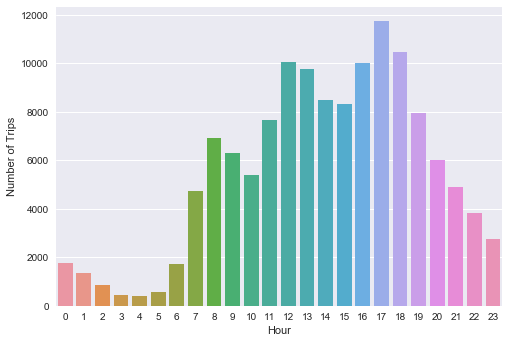

In [29]:
sns.barplot(data=df.groupby('hour').count().reset_index(), x='hour', y='Trip ID')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

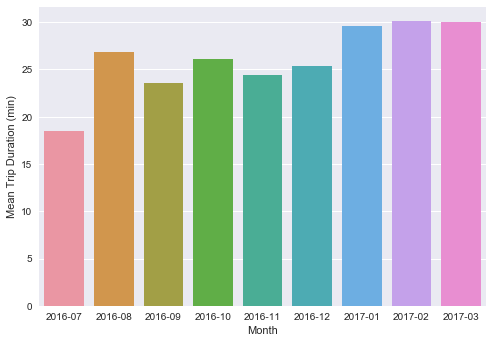

In [30]:
x = df.groupby('month').mean().reset_index()['month']
y = df.groupby('month').mean().reset_index()['Duration']/60
sns.barplot(x=x, y=y)
plt.xlabel('Month')
plt.ylabel('Mean Trip Duration (min)')
plt.show()

In [31]:
month_passes = df.groupby('month')['Passholder Type'].value_counts().unstack()
month_passes = month_passes.fillna(0).reset_index()
month_passes = pd.melt(month_passes, id_vars="month", var_name="Passholder Type", value_name="Count")
month_passes.head()

,month,Passholder Type,Count
0,2016-07,Flex Pass,1667.0
1,2016-08,Flex Pass,1586.0
2,2016-09,Flex Pass,1178.0
3,2016-10,Flex Pass,1266.0
4,2016-11,Flex Pass,901.0


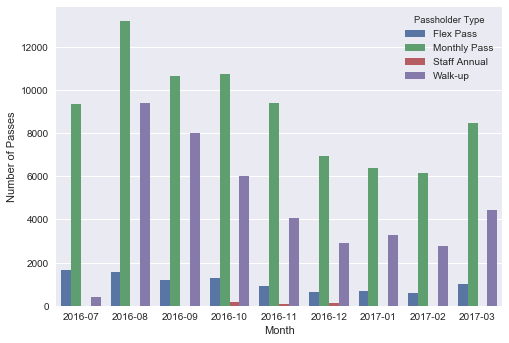

In [32]:
sns.barplot(x='month', y='Count', hue='Passholder Type', data=month_passes)
plt.xlabel('Month')
plt.ylabel('Number of Passes')
plt.show()

In [33]:
df.groupby('day').count().reset_index()['Trip ID'].mean()

494.1305970149254

In [34]:
stations = pd.read_csv('stations.csv')
stations[stations['Station_ID'] == 3009]

,Station_ID,Station_Name,Go_live_date,Region,Status


In [129]:
def data_to_arr(df):
    res = []
    for hour in range(24):
        try:
            res.append(str(df['Trip ID'][hour]))
        except:
            res.append('0')
    return res


dic = {}

for row in station_locs.iterrows():
    sid = int(row[0])
    long = row[1]['Starting Station Longitude']
    lat = row[1]['Starting Station Latitude']
    starting = df[df['Starting Station ID'] == sid]
    ending = df[df['Ending Station ID'] == sid]
    starting_or_ending = df[(df['Ending Station ID'] == sid) | (df['Starting Station ID'] == sid)]
    biggest_dest = starting[starting['Trip Route Category'] == 'One Way'].groupby('Ending Station ID').count().reset_index().sort_values(by='Trip ID', ascending=False)['Ending Station ID'].iloc[0]
    biggest_source = ending[ending['Trip Route Category'] == 'One Way'].groupby('Starting Station ID').count().reset_index().sort_values(by='Trip ID', ascending=False)['Starting Station ID'].iloc[0]
    trips_leaving = data_to_arr(starting.groupby('hour').count())
    trips_arriving = data_to_arr(ending.groupby('hour').count())
    assert len(trips_leaving) == len(trips_arriving) and len(trips_leaving) == 24
    try:
        name = stations[stations['Station_ID'] == sid]['Station_Name'].iloc[0]
    except:
        name = "Station #{}".format(sid)
    try:
        opening = stations[stations['Station_ID'] == sid]['Go_live_date'].iloc[0]
    except:
        opening = "N/A"
    if not (np.isnan(long) or np.isnan(lat)):
        dic[sid] = {
            'coordinates': [long, lat],
            'name': name,
            'open_since': opening,
            'data': {
                'trips_leaving': trips_leaving,
                'trips_arriving': trips_arriving,
                'biggest_dest': biggest_dest,
                'biggest_source': biggest_source,
                'trip_count': starting_or_ending.shape[0],
                'trip_avg': starting_or_ending.groupby('day').count()['Trip ID'].mean(),
                'distance_avg': starting_or_ending['Duration'].mean() * avgSpeed
            }
        }

import json


text_file = open("stationInfo.json", "w")
text_file.write(json.dumps(dic))
text_file.close()

In [36]:
start_station = df.groupby('Starting Station ID')['Ending Station ID'].value_counts()#.unstack()
start_station.head()

Starting Station ID  Ending Station ID
3000.0               3000.0               5
                     3052.0               3
                     3058.0               3
                     3069.0               3
                     3014.0               2
Name: Ending Station ID, dtype: int64

In [37]:
end_station = df.groupby('Ending Station ID')['Starting Station ID'].value_counts()#.unstack()
end_station.head()

Ending Station ID  Starting Station ID
3000.0             3082.0                 46
                   3064.0                 40
                   3069.0                 40
                   3031.0                 34
                   3062.0                 34
Name: Starting Station ID, dtype: int64

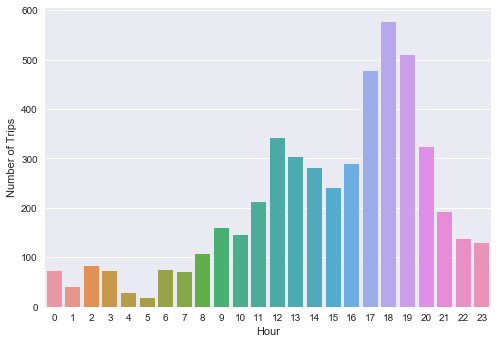

In [38]:
sns.barplot(data=df[df['Starting Station ID'] == 3005].groupby('hour').count().reset_index(), x='hour', y='Trip ID')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

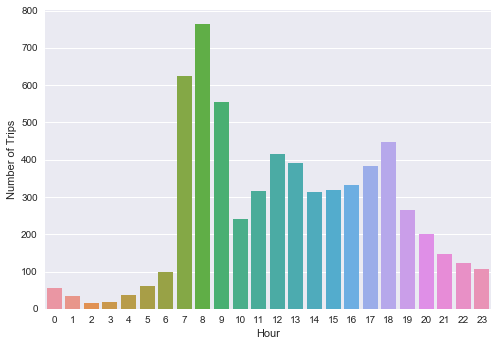

In [39]:
sns.barplot(data=df[df['Ending Station ID'] == 3005].groupby('hour').count().reset_index(), x='hour', y='Trip ID')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

In [63]:
arriving = df[df['Ending Station ID'] == 4108].groupby('hour').count()
arriving

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Distance,month,day
hour,,,,,,,,,,,,,,,,,,,
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,2,2,2,2,2,2,2,2,2,2,2,1,2,2,1,2,2,2,2
7,9,9,9,9,9,9,9,9,9,9,9,1,9,9,4,9,9,9,9
8,13,13,13,13,13,13,13,13,13,13,13,6,13,13,6,13,13,13,13
9,17,17,17,17,17,17,17,17,17,17,17,12,17,17,7,17,17,17,17
10,10,10,10,10,10,10,10,10,10,10,10,6,10,10,2,10,10,10,10
11,16,16,16,16,16,16,16,16,16,16,16,11,16,16,7,16,16,16,16
12,6,6,6,6,6,6,6,6,6,6,5,0,6,6,1,6,6,6,6
13,16,16,16,16,16,16,16,16,16,16,16,8,16,16,8,16,16,16,16


In [71]:
trips_arriving = []
for hour in range(24):
    try:
        trips_arriving.append(arriving['Trip ID'][hour])
    except:
        trips_arriving.append(0)
trips_arriving


[0,
 0,
 0,
 0,
 0,
 1,
 2,
 9,
 13,
 17,
 10,
 16,
 6,
 16,
 15,
 10,
 10,
 10,
 5,
 4,
 2,
 9,
 0,
 0]

In [59]:
df[df['Ending Station ID'] == 4108].groupby('hour').count()['Trip ID']

hour
5      1
6      2
7      9
8     13
9     17
10    10
11    16
12     6
13    16
14    15
15    10
16    10
17    10
18     5
19     4
20     2
21     9
Name: Trip ID, dtype: int64

In [80]:
list(df.groupby('month').mean().reset_index()['Duration']/60)

[18.466637478108581,
 26.860514221835796,
 23.550387596899224,
 26.094388457514182,
 24.388288288288287,
 25.317535098464148,
 29.600560548951385,
 30.114444560998638,
 30.016180066158491]

In [99]:
df[df['Starting Station ID'] == 3005].groupby('Ending Station ID').count().reset_index().sort_values(by='Trip ID', ascending=False)['Ending Station ID'].iloc[0]

3031.0

In [100]:
df[df['Ending Station ID'] == 3005].groupby('Starting Station ID').count().reset_index().sort_values(by='Trip ID', ascending=False)['Starting Station ID'].iloc[0]

3031.0

In [116]:
df[(df['Starting Station ID'] == 3010) & (df['Trip Route Category'] == 'One Way')].groupby('Ending Station ID').count().reset_index().sort_values(by='Trip ID', ascending=False).iloc[0]

Ending Station ID             3014.0
Trip ID                         89.0
Duration                        89.0
Start Time                      89.0
End Time                        89.0
Starting Station ID             89.0
Starting Station Latitude       89.0
Starting Station Longitude      89.0
Ending Station Latitude         89.0
Ending Station Longitude        89.0
Bike ID                         89.0
Plan Duration                   89.0
Trip Route Category             89.0
Passholder Type                 89.0
Starting Lat-Long               85.0
Ending Lat-Long                 89.0
Distance                        89.0
month                           89.0
hour                            89.0
day                             89.0
Name: 5, dtype: float64

In [127]:
df[(df['Ending Station ID'] == 3069) | (df['Starting Station ID'] == 3069)].groupby('day').count()['Trip ID'].mean()

36.59176029962547

In [128]:
df[(df['Ending Station ID'] == 3069) | (df['Starting Station ID'] == 3069)]['Duration'].mean()

1532.2845445240532